# Exp 6 - Remove features vs scores
Remove columns one by one to see how the scores change

### Import packages

In [1]:
import itertools
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from utilities import cal_score, convert_types

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/lightgbm/__init__.py:45: FutureWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS will be built by the Apple Clang compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you won't need to install the gcc compiler anymore.
Instead of that, you'll need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", FutureWarning)


### Columns

In [2]:
cols_num = ['txn_dt', 'total_floor', 'building_complete_dt', 'parking_area', 'parking_price', 'txn_floor', 'land_area', 'building_area', 'lat', 'lon', 'village_income_median', 'town_population', 'town_area', 'town_population_density', 'doc_rate', 'master_rate', 'bachelor_rate', 'jobschool_rate', 'highschool_rate', 'junior_rate', 'elementary_rate', 'born_rate', 'death_rate', 'marriage_rate', 'divorce_rate', 'N_50', 'N_500', 'N_1000', 'N_5000', 'N_10000', 'I_10', 'I_50', 'I_100', 'I_250', 'I_500', 'I_1000', 'I_5000', 'I_10000', 'I_MIN', 'II_10', 'II_50', 'II_100', 'II_250', 'II_500', 'II_1000', 'II_5000', 'II_10000', 'II_MIN', 'III_10', 'III_50', 'III_100', 'III_250', 'III_500', 'III_1000', 'III_5000', 'III_10000', 'III_MIN', 'IV_10', 'IV_50', 'IV_100', 'IV_250', 'IV_500', 'IV_1000', 'IV_5000', 'IV_10000', 'IV_MIN', 'V_10', 'V_50', 'V_100', 'V_250', 'V_500', 'V_1000', 'V_5000', 'V_10000', 'V_MIN', 'VI_50', 'VI_100', 'VI_250', 'VI_500', 'VI_1000', 'VI_5000', 'VI_10000', 'VI_MIN', 'VII_10', 'VII_50', 'VII_100', 'VII_250', 'VII_500', 'VII_1000', 'VII_5000', 'VII_10000', 'VII_MIN', 'VIII_10', 'VIII_50', 'VIII_100', 'VIII_250', 'VIII_500', 'VIII_1000', 'VIII_5000', 'VIII_10000', 'VIII_MIN', 'IX_10', 'IX_50', 'IX_100', 'IX_250', 'IX_500', 'IX_1000', 'IX_5000', 'IX_10000', 'IX_MIN', 'X_10', 'X_50', 'X_100', 'X_250', 'X_500', 'X_1000', 'X_5000', 'X_10000', 'X_MIN', 'XI_10', 'XI_50', 'XI_100', 'XI_250', 'XI_500', 'XI_1000', 'XI_5000', 'XI_10000', 'XI_MIN', 'XII_10', 'XII_50', 'XII_100', 'XII_250', 'XII_500', 'XII_1000', 'XII_5000', 'XII_10000', 'XII_MIN', 'XIII_10', 'XIII_50', 'XIII_100', 'XIII_250', 'XIII_500', 'XIII_1000', 'XIII_5000', 'XIII_10000', 'XIII_MIN', 'XIV_10', 'XIV_50', 'XIV_100', 'XIV_250', 'XIV_500', 'XIV_1000', 'XIV_5000', 'XIV_10000', 'XIV_MIN']
cols_cat = ['building_material', 'city', 'building_type', 'building_use', 'parking_way', 'town', 'village']
cols_bin = ['I_index_50', 'I_index_500', 'I_index_1000', 'II_index_50', 'II_index_500', 'II_index_1000', 'III_index_50', 'III_index_500', 'III_index_1000', 'IV_index_50', 'IV_index_500', 'IV_index_1000', 'IV_index_5000', 'V_index_50', 'V_index_500', 'V_index_1000', 'VI_10', 'VI_index_50', 'VI_index_500', 'VI_index_1000', 'VII_index_50', 'VII_index_500', 'VII_index_1000', 'VIII_index_50', 'VIII_index_500', 'VIII_index_1000', 'IX_index_50', 'IX_index_500', 'IX_index_1000', 'IX_index_5000', 'X_index_50', 'X_index_500', 'X_index_1000', 'XI_index_50', 'XI_index_500', 'XI_index_1000', 'XI_index_5000', 'XI_index_10000', 'XII_index_50', 'XII_index_500', 'XII_index_1000', 'XIII_index_50', 'XIII_index_500', 'XIII_index_1000', 'XIII_index_5000', 'XIII_index_10000', 'XIV_index_50', 'XIV_index_500', 'XIV_index_1000']
cols_feats = cols_num + cols_cat + cols_bin

col_target = 'total_price'
col_target_log1p = 'target'

#### Order of columns to be remove

In [3]:
feat_rm = ['XIII_index_500', 'VI_500', 'IX_index_50', 'I_50', 'III_index_50', 'XIV_100', 'X_50', 'VI_index_500', 'VIII_index_50', 'XI_index_1000', 'XIII_250', 'N_500', 'XIII_index_50', 'I_index_1000', 'I_10', 'IV_index_1000', 'VIII_index_1000', 'IX_index_1000', 'I_index_50', 'XIII_10', 'X_index_50', 'IX_50', 'VI_10', 'IX_index_5000', 'XI_index_10000', 'XII_index_1000', 'XIV_index_1000', 'IV_index_5000', 'II_index_1000', 'VII_index_1000', 'XI_index_5000', 'XIII_index_5000', 'II_index_500', 'X_100', 'IX_100', 'XII_index_50', 'XIV_index_500', 'IV_index_50', 'XII_index_500', 'VI_index_50', 'N_5000', 'XIII_100', 'IX_10', 'XIII_index_10000', 'II_index_50', 'XI_index_500', 'V_index_1000', 'VII_index_50', 'VIII_50', 'XIV_10', 'X_10', 'XI_10', 'VI_50', 'III_index_1000', 'XIII_index_1000', 'II_10', 'V_index_500', 'I_100', 'IV_index_500', 'VIII_index_500', 'X_index_500', 'VI_1000', 'VI_index_1000', 'VII_index_500', 'XIV_index_50', 'III_index_500', 'IV_10', 'V_index_50', 'XI_50', 'III_10', 'VII_10', 'XIII_500', 'XIII_50', 'XI_index_50', 'I_index_500', 'XI_100', 'V_10', 'N_10000', 'XII_10', 'I_1000', 'X_index_1000', 'IV_50', 'IV_100', 'VI_100', 'IX_index_500', 'VI_250', 'V_100', 'divorce_rate', 'II_50', 'junior_rate', 'V_50', 'VIII_10', 'II_250', 'XII_50', 'III_100', 'I_250', 'N_1000', 'IV_250', 'XI_500', 'XIV_50', 'IV_500', 'XI_250', 'II_100', 'X_250', 'IX_250', 'III_50', 'III_500', 'X_500', 'VII_50', 'VIII_5000', 'III_250', 'VII_100', 'I_500', 'XII_100', 'II_10000', 'born_rate', 'XIV_250', 'IV_1000', 'III_5000', 'town_area', 'XIII_1000', 'IV_5000', 'marriage_rate', 'XIII_MIN', 'VIII_100', 'X_10000', 'V_250', 'parking_area', 'N_50', 'XIV_500', 'IV_10000', 'death_rate', 'highschool_rate', 'VIII_250', 'VI_MIN', 'II_500', 'XII_250', 'XI_5000', 'VIII_10000', 'I_5000', 'V_1000', 'II_MIN', 'III_1000', 'XII_MIN', 'building_material', 'V_MIN', 'XIV_10000', 'X_5000', 'IX_MIN', 'XIV_1000', 'I_MIN', 'XIV_MIN', 'IX_500', 'XI_MIN', 'town_population_density', 'XII_5000', 'III_MIN', 'IX_5000', 'VIII_500', 'IV_MIN', 'VII_MIN', 'VI_5000', 'III_10000', 'X_MIN', 'X_1000', 'V_500', 'XII_500', 'XII_10000', 'II_5000', 'town_population', 'VIII_MIN', 'IX_10000', 'I_10000', 'II_1000', 'VII_250', 'V_5000', 'building_use', 'bachelor_rate', 'XI_1000', 'VII_5000', 'lat', 'VIII_1000', 'XII_1000', 'IX_1000', 'VII_500', 'city', 'XI_10000', 'V_10000', 'parking_way', 'VII_1000', 'XIV_5000', 'elementary_rate', 'jobschool_rate', 'XIII_5000', 'master_rate', 'lon', 'VI_10000', 'parking_price', 'doc_rate', 'village', 'VII_10000', 'total_floor', 'village_income_median', 'building_type', 'txn_floor', 'txn_dt', 'building_complete_dt', 'XIII_10000', 'land_area', 'town', 'building_area']
print('N of features removed', len(feat_rm))

N of features removed 211


### Read data

In [4]:
df = pd.read_csv('dataset/train.csv', dtype=object)

In [5]:
df.columns

Index(['building_id', 'building_material', 'city', 'txn_dt', 'total_floor',
       'building_type', 'building_use', 'building_complete_dt', 'parking_way',
       'parking_area',
       ...
       'XIV_500', 'XIV_index_500', 'XIV_1000', 'XIV_index_1000', 'XIV_5000',
       'XIV_index_5000', 'XIV_10000', 'XIV_index_10000', 'XIV_MIN',
       'total_price'],
      dtype='object', length=235)

### Preprocessing

In [6]:
# Convert types
df = convert_types(df, cols_num, col_target=col_target)

# Generate feats (train-test-same feats)
#create_feats(df)

### Target transform

In [7]:
def target_transform(df):  # Add new columns inplace!!
    '''Transform the original target to the target for model to train on'''
    df['log_total_price'] = np.log1p(df['total_price'])
    return df

def target_inverse_transform(df, y_pred):
    '''Inverse transorform the model target to the original target of our problem'''
    y_pred_expm1 = np.expm1(y_pred)
    y_pred_final = np.clip(y_pred_expm1, 0, None)
    return y_pred_final            

In [8]:
df = target_transform(df)

In [9]:
# transformed target fit by the model
col_model_target = 'log_total_price'
#col_model_target = 'total_price'

### Feat engineering

In [10]:
from feature_engineering import CategoricalColumnsEncoder

In [11]:
class FeatureEngineering():
    def __init__(self):
        pass
    
    def fit_transform(self, df, cols_cat, cols_bin):
        df = df.copy()
        # Denote categorical-type
        self.cat_encoder = CategoricalColumnsEncoder(mode='pandas')
        self.cat_encoder.fit_transform(df, cols_cat+cols_bin)
        return df
    
    def transform(self, df):
        df = df.copy()
        self.cat_encoder.transform(df)
        return df

### Grid search

In [12]:
# grid search
lgb_other_params = {'num_boost_round': 10000,
                    'verbose_eval': 2000,
                    'early_stopping_rounds': 1000,
                   }

#### Remove 45 - 55 features

In [13]:
%%time
params_fix = {'task': 'train',
              'boosting_type': 'gbdt',
              'objective': 'mse',
              'metric': 'mape',
              'learning_rate': 0.015,
              'num_leaves': 255,
              'feature_fraction': 0.5,
              'min_data_in_leaf': 5,
              'lambda_l1': 0.1,
              'lambda_l2': 0,
              }

gsearch = {}
folds = KFold(n_splits=3, shuffle=True, random_state=123)
for i_fold, (itrain, ival) in enumerate(folds.split(df)): # kfold
    print('==== Fold', i_fold+1, '====')
    
    # split train, val
    df_train = df.loc[itrain]
    df_val = df.loc[ival]
    
    # feat eng
    feat_eng = FeatureEngineering()
    df_train = feat_eng.fit_transform(df_train, cols_cat, cols_bin)
    df_val = feat_eng.transform(df_val)
    
    # Feature remove
    cols_feats_step = cols_feats.copy()
    
    step_feat_rm = 1
    for n_feat_rm in range(45, 56, step_feat_rm):
        feat_rm_batch = feat_rm[:n_feat_rm]
        print('Remove least', n_feat_rm, 'features upto:', feat_rm_batch[-1])
        cols_feats_step = [c for c in cols_feats_step if c not in feat_rm_batch]
        print('N remaining features:', len(cols_feats_step))

        # Construct lgb dataset
        lgb_train = lgb.Dataset(df_train[cols_feats_step], df_train[col_model_target]).construct()
        lgb_val = lgb.Dataset(df_val[cols_feats_step], df_val[col_model_target], reference=lgb_train).construct()

        params = params_fix.copy()

        model = lgb.train(params, lgb_train, valid_sets=lgb_val, **lgb_other_params)

        y_pred = model.predict(df_val[cols_feats_step])

        y_pred_final = target_inverse_transform(df_val, y_pred)

        score = cal_score(df_val['total_price'], y_pred_final)
        print(score)
        tuple_params = n_feat_rm
        gsearch[tuple_params] = gsearch.get(tuple_params, []) + [score]

# aggregate, sort gsearch results
gsearch_results1 = [[key, np.mean(val), val] for key, val in gsearch.items()]
gsearch_results1.sort(key= lambda x: x[0])

==== Fold 1 ====
Remove least 45 features upto: II_index_50
N remaining features: 166
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00862526
[4000]	valid_0's mape: 0.00850307
[6000]	valid_0's mape: 0.00847179
[8000]	valid_0's mape: 0.0084615
[10000]	valid_0's mape: 0.00845662
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.00845662
5574.865001856178
Remove least 46 features upto: XI_index_500
N remaining features: 165
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00863
[4000]	valid_0's mape: 0.00850528
[6000]	valid_0's mape: 0.00847454
[8000]	valid_0's mape: 0.00846388
[10000]	valid_0's mape: 0.00845904
Did not meet early stopping. Best iteration is:
[9987]	valid_0's mape: 0.00845904
5534.864849392826
Remove least 47 features upto: V_index_1000
N remaining features: 164
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00861721
[4000]	va

[2000]	valid_0's mape: 0.00870551
[4000]	valid_0's mape: 0.00858847
[6000]	valid_0's mape: 0.00855811
[8000]	valid_0's mape: 0.00854595
[10000]	valid_0's mape: 0.00854093
Did not meet early stopping. Best iteration is:
[9998]	valid_0's mape: 0.00854093
5523.865375098552
Remove least 55 features upto: XIII_index_1000
N remaining features: 156
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00877176
[4000]	valid_0's mape: 0.00865063
[6000]	valid_0's mape: 0.00861968
[8000]	valid_0's mape: 0.0086071
[10000]	valid_0's mape: 0.00860159
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.00860159
5474.86439746247
==== Fold 3 ====
Remove least 45 features upto: II_index_50
N remaining features: 166
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00876447
[4000]	valid_0's mape: 0.00863742
[6000]	valid_0's mape: 0.00860473
[8000]	valid_0's mape: 0.00859117
[10000]	valid_0's mape: 0.0085849
Di

In [14]:
gsearch_results1.sort(key= lambda x: x[0])

In [15]:
display(gsearch_results1)

[[45,
  5528.197007613715,
  [5574.865001856178, 5492.864744523101, 5516.861276461866]],
 [46,
  5537.197174301834,
  [5534.864849392826, 5522.864979118429, 5553.861694394247]],
 [47,
  5537.530625765317,
  [5554.864915912952, 5516.865315552375, 5540.861645830625]],
 [48,
  5535.5304983229325,
  [5572.864930327295, 5494.864961644069, 5538.861602997434]],
 [49,
  5518.1969352615315,
  [5559.865134888065, 5466.86448628333, 5527.861184613202]],
 [50,
  5541.530596445555,
  [5552.86498432601, 5520.8654143845815, 5550.8613906260725]],
 [51,
  5505.529874055246,
  [5524.86474892536, 5480.864031567135, 5510.860841673246]],
 [52,
  5544.530641014918,
  [5573.864776148716, 5520.865074254275, 5538.862072641765]],
 [53,
  5533.530464619963,
  [5560.864929044257, 5510.8648037378025, 5528.861661077831]],
 [54,
  5525.530556527851,
  [5525.864699842756, 5523.865375098552, 5526.861594642246]],
 [55,
  5498.530064632057,
  [5511.8650054164, 5474.86439746247, 5508.860791017296]]]

In [16]:
def plot_rm_feature_scores(gs_results):
    plt.plot([row[0] for row in gs_results], [row[1] for row in gs_results])
    plt.plot([row[0] for row in gs_results], [row[2][0] for row in gs_results], alpha=0.5)
    plt.plot([row[0] for row in gs_results], [row[2][1] for row in gs_results], alpha=0.5)
    plt.plot([row[0] for row in gs_results], [row[2][2] for row in gs_results], alpha=0.5)
    plt.xlabel('N features removed')
    plt.ylabel('score')
    plt.grid(); plt.show()

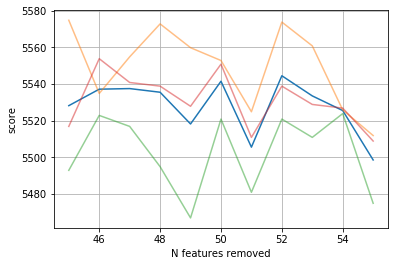

In [17]:
plot_rm_feature_scores(gsearch_results1)

#### Remove 18 - 28 features

In [18]:
%%time
params_fix2 = {'task': 'train',
              'boosting_type': 'gbdt',
              'objective': 'mse',
              'metric': 'mape',
              'learning_rate': 0.015,
              'num_leaves': 255,
              'feature_fraction': 0.5,
              'min_data_in_leaf': 5,
              'lambda_l1': 0.1,
              'lambda_l2': 0.1,
              }

gsearch = {}
folds = KFold(n_splits=3, shuffle=True, random_state=123)
for i_fold, (itrain, ival) in enumerate(folds.split(df)): # kfold
    print('==== Fold', i_fold+1, '====')
    
    # split train, val
    df_train = df.loc[itrain]
    df_val = df.loc[ival]
    
    # feat eng
    feat_eng = FeatureEngineering()
    df_train = feat_eng.fit_transform(df_train, cols_cat, cols_bin)
    df_val = feat_eng.transform(df_val)
    
    # Feature remove
    cols_feats_step = cols_feats.copy()
    
    step_feat_rm = 1
    for n_feat_rm in range(18, 29, step_feat_rm):
        feat_rm_batch = feat_rm[:n_feat_rm]
        print('Remove least', n_feat_rm, 'features upto:', feat_rm_batch[-1])
        cols_feats_step = [c for c in cols_feats_step if c not in feat_rm_batch]
        print('N remaining features:', len(cols_feats_step))

        # Construct lgb dataset
        lgb_train = lgb.Dataset(df_train[cols_feats_step], df_train[col_model_target]).construct()
        lgb_val = lgb.Dataset(df_val[cols_feats_step], df_val[col_model_target], reference=lgb_train).construct()

        params = params_fix2.copy()

        model = lgb.train(params, lgb_train, valid_sets=lgb_val, **lgb_other_params)

        y_pred = model.predict(df_val[cols_feats_step])

        y_pred_final = target_inverse_transform(df_val, y_pred)

        score = cal_score(df_val['total_price'], y_pred_final)
        print(score)
        tuple_params = n_feat_rm
        gsearch[tuple_params] = gsearch.get(tuple_params, []) + [score]

# aggregate, sort gsearch results
gsearch_results2 = [[key, np.mean(val), val] for key, val in gsearch.items()]
gsearch_results2.sort(key= lambda x: x[0])

==== Fold 1 ====
Remove least 18 features upto: IX_index_1000
N remaining features: 193
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00861451
[4000]	valid_0's mape: 0.00849298
[6000]	valid_0's mape: 0.00846328
[8000]	valid_0's mape: 0.00845292
[10000]	valid_0's mape: 0.00844832
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.00844832
5534.8651266010365
Remove least 19 features upto: I_index_50
N remaining features: 192
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00866229
[4000]	valid_0's mape: 0.00853698
[6000]	valid_0's mape: 0.00850483
[8000]	valid_0's mape: 0.0084937
[10000]	valid_0's mape: 0.00848882
Did not meet early stopping. Best iteration is:
[9987]	valid_0's mape: 0.00848882
5519.864417440262
Remove least 20 features upto: XIII_10
N remaining features: 191
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00862892
[4000]	val

[2000]	valid_0's mape: 0.00873332
[4000]	valid_0's mape: 0.00860976
[6000]	valid_0's mape: 0.00857842
[8000]	valid_0's mape: 0.00856762
[10000]	valid_0's mape: 0.0085619
Did not meet early stopping. Best iteration is:
[9996]	valid_0's mape: 0.0085619
5488.865131107558
Remove least 28 features upto: IV_index_5000
N remaining features: 183
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00871292
[4000]	valid_0's mape: 0.008589
[6000]	valid_0's mape: 0.00855672
[8000]	valid_0's mape: 0.00854466
[10000]	valid_0's mape: 0.00853902
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.00853902
5492.865340147324
==== Fold 3 ====
Remove least 18 features upto: IX_index_1000
N remaining features: 193
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00876425
[4000]	valid_0's mape: 0.00863116
[6000]	valid_0's mape: 0.00859743
[8000]	valid_0's mape: 0.00858455
[10000]	valid_0's mape: 0.0085784
Did 

In [37]:
display(gsearch_results2)

[[18,
  5524.530609206596,
  [5534.8651266010365, 5522.864999031114, 5515.861701987637]],
 [19,
  5509.530233533375,
  [5519.864417440262, 5487.864981155491, 5520.861302004374]],
 [20,
  5517.863630051527,
  [5529.86504669048, 5488.864749803437, 5534.861093660664]],
 [21,
  5501.863221024539,
  [5522.8647711143185, 5481.864223723277, 5500.860668236021]],
 [22,
  5546.864193165759,
  [5594.864973334109, 5522.865595699588, 5522.862010463583]],
 [23,
  5526.863922757624,
  [5540.864776456598, 5488.865131107558, 5550.861860708716]],
 [24,
  5526.863922757624,
  [5540.864776456598, 5488.865131107558, 5550.861860708716]],
 [25,
  5526.863922757624,
  [5540.864776456598, 5488.865131107558, 5550.861860708716]],
 [26,
  5526.863922757624,
  [5540.864776456598, 5488.865131107558, 5550.861860708716]],
 [27,
  5526.863922757624,
  [5540.864776456598, 5488.865131107558, 5550.861860708716]],
 [28,
  5508.197187179428,
  [5500.864696134539, 5492.865340147324, 5530.861525256419]]]

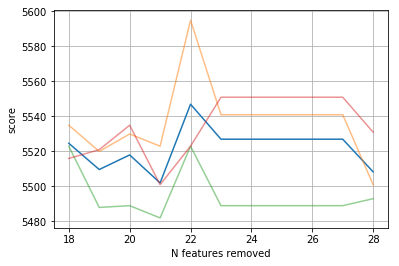

In [20]:
plot_rm_feature_scores(gsearch_results2)

#### Remove 1 - 10 features

In [21]:
%%time
params_fix3 = {'task': 'train',
              'boosting_type': 'gbdt',
              'objective': 'mse',
              'metric': 'mape',
              'learning_rate': 0.015,
              'num_leaves': 255,
              'feature_fraction': 0.5,
              'min_data_in_leaf': 5,
              'lambda_l1': 0.1,
              'lambda_l2': 0,
              }

gsearch = {}
folds = KFold(n_splits=3, shuffle=True, random_state=123)
for i_fold, (itrain, ival) in enumerate(folds.split(df)): # kfold
    print('==== Fold', i_fold+1, '====')
    
    # split train, val
    df_train = df.loc[itrain]
    df_val = df.loc[ival]
    
    # feat eng
    feat_eng = FeatureEngineering()
    df_train = feat_eng.fit_transform(df_train, cols_cat, cols_bin)
    df_val = feat_eng.transform(df_val)
    
    # Feature remove
    cols_feats_step = cols_feats.copy()
    
    step_feat_rm = 1
    for n_feat_rm in range(1, 11, step_feat_rm):
        feat_rm_batch = feat_rm[:n_feat_rm]
        print('Remove least', n_feat_rm, 'features upto:', feat_rm_batch[-1])
        cols_feats_step = [c for c in cols_feats_step if c not in feat_rm_batch]
        print('N remaining features:', len(cols_feats_step))

        # Construct lgb dataset
        lgb_train = lgb.Dataset(df_train[cols_feats_step], df_train[col_model_target]).construct()
        lgb_val = lgb.Dataset(df_val[cols_feats_step], df_val[col_model_target], reference=lgb_train).construct()

        params = params_fix3.copy()

        model = lgb.train(params, lgb_train, valid_sets=lgb_val, **lgb_other_params)

        y_pred = model.predict(df_val[cols_feats_step])

        y_pred_final = target_inverse_transform(df_val, y_pred)

        score = cal_score(df_val['total_price'], y_pred_final)
        print(score)
        tuple_params = n_feat_rm
        gsearch[tuple_params] = gsearch.get(tuple_params, []) + [score]

# aggregate, sort gsearch results
gsearch_results3 = [[key, np.mean(val), val] for key, val in gsearch.items()]
gsearch_results3.sort(key= lambda x: x[0])

==== Fold 1 ====
Remove least 1 features upto: XIII_index_500
N remaining features: 210
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00863435
[4000]	valid_0's mape: 0.00851634
[6000]	valid_0's mape: 0.0084866
[8000]	valid_0's mape: 0.00847577
[10000]	valid_0's mape: 0.00847111
Did not meet early stopping. Best iteration is:
[9999]	valid_0's mape: 0.00847111
5572.864775063605
Remove least 2 features upto: VI_500
N remaining features: 209
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00861289
[4000]	valid_0's mape: 0.00849232
[6000]	valid_0's mape: 0.00846205
[8000]	valid_0's mape: 0.00845123
[10000]	valid_0's mape: 0.00844678
Did not meet early stopping. Best iteration is:
[9996]	valid_0's mape: 0.00844677
5550.865137441896
Remove least 3 features upto: IX_index_50
N remaining features: 208
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00863036
[4000]	valid_0

[2000]	valid_0's mape: 0.00878023
[4000]	valid_0's mape: 0.00865302
[6000]	valid_0's mape: 0.00861809
[8000]	valid_0's mape: 0.00860574
[10000]	valid_0's mape: 0.0086001
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.0086001
5532.861325117652
Remove least 2 features upto: VI_500
N remaining features: 209
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00873504
[4000]	valid_0's mape: 0.00860866
[6000]	valid_0's mape: 0.00857563
[8000]	valid_0's mape: 0.00856341
[10000]	valid_0's mape: 0.00855847
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.00855847
5526.861886406648
Remove least 3 features upto: IX_index_50
N remaining features: 208
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00873341
[4000]	valid_0's mape: 0.00861015
[6000]	valid_0's mape: 0.00857886
[8000]	valid_0's mape: 0.00856732
[10000]	valid_0's mape: 0.00856201
Did not meet early stopping.

In [22]:
display(gsearch_results3)

[[1,
  5537.197012150561,
  [5572.864775063605, 5505.864936270423, 5532.861325117652]],
 [2,
  5524.864088443818,
  [5550.865137441896, 5496.865241482913, 5526.861886406648]],
 [3,
  5524.86404785325,
  [5552.864887200053, 5480.865387254302, 5540.861869105393]],
 [4,
  5528.86378087839,
  [5536.86473235062, 5502.864980373298, 5546.861629911253]],
 [5,
  5509.863531971663,
  [5520.864965538016, 5488.864414555816, 5519.861215821156]],
 [6,
  5529.197130552368,
  [5556.865024132825, 5489.864925828897, 5540.861441695382]],
 [7,
  5527.530449727041,
  [5542.865080380608, 5512.8649072297685, 5526.861361570745]],
 [8,
  5503.530180744875,
  [5550.865065670099, 5456.864320391528, 5502.861156172998]],
 [9,
  5530.197026934368,
  [5546.864768067502, 5490.8648908094565, 5552.861421926144]],
 [10,
  5528.530586512938,
  [5538.865091815424, 5506.864758491032, 5539.861909232358]]]

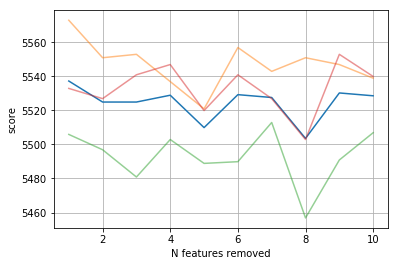

In [23]:
plot_rm_feature_scores(gsearch_results3)

#### Remove 95-105 features

In [21]:
%%time
params_fix3 = {'task': 'train',
              'boosting_type': 'gbdt',
              'objective': 'mse',
              'metric': 'mape',
              'learning_rate': 0.015,
              'num_leaves': 255,
              'feature_fraction': 0.5,
              'min_data_in_leaf': 5,
              'lambda_l1': 0.1,
              'lambda_l2': 0,
              }

gsearch = {}
folds = KFold(n_splits=3, shuffle=True, random_state=123)
for i_fold, (itrain, ival) in enumerate(folds.split(df)): # kfold
    print('==== Fold', i_fold+1, '====')
    
    # split train, val
    df_train = df.loc[itrain]
    df_val = df.loc[ival]
    
    # feat eng
    feat_eng = FeatureEngineering()
    df_train = feat_eng.fit_transform(df_train, cols_cat, cols_bin)
    df_val = feat_eng.transform(df_val)
    
    # Feature remove
    cols_feats_step = cols_feats.copy()
    
    step_feat_rm = 1
    for n_feat_rm in range(1, 11, step_feat_rm):
        feat_rm_batch = feat_rm[:n_feat_rm]
        print('Remove least', n_feat_rm, 'features upto:', feat_rm_batch[-1])
        cols_feats_step = [c for c in cols_feats_step if c not in feat_rm_batch]
        print('N remaining features:', len(cols_feats_step))

        # Construct lgb dataset
        lgb_train = lgb.Dataset(df_train[cols_feats_step], df_train[col_model_target]).construct()
        lgb_val = lgb.Dataset(df_val[cols_feats_step], df_val[col_model_target], reference=lgb_train).construct()

        params = params_fix3.copy()

        model = lgb.train(params, lgb_train, valid_sets=lgb_val, **lgb_other_params)

        y_pred = model.predict(df_val[cols_feats_step])

        y_pred_final = target_inverse_transform(df_val, y_pred)

        score = cal_score(df_val['total_price'], y_pred_final)
        print(score)
        tuple_params = n_feat_rm
        gsearch[tuple_params] = gsearch.get(tuple_params, []) + [score]

# aggregate, sort gsearch results
gsearch_results3 = [[key, np.mean(val), val] for key, val in gsearch.items()]
gsearch_results3.sort(key= lambda x: x[0])

==== Fold 1 ====
Remove least 1 features upto: XIII_index_500
N remaining features: 210
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00863435
[4000]	valid_0's mape: 0.00851634
[6000]	valid_0's mape: 0.0084866
[8000]	valid_0's mape: 0.00847577
[10000]	valid_0's mape: 0.00847111
Did not meet early stopping. Best iteration is:
[9999]	valid_0's mape: 0.00847111
5572.864775063605
Remove least 2 features upto: VI_500
N remaining features: 209
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00861289
[4000]	valid_0's mape: 0.00849232
[6000]	valid_0's mape: 0.00846205
[8000]	valid_0's mape: 0.00845123
[10000]	valid_0's mape: 0.00844678
Did not meet early stopping. Best iteration is:
[9996]	valid_0's mape: 0.00844677
5550.865137441896
Remove least 3 features upto: IX_index_50
N remaining features: 208
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00863036
[4000]	valid_0

[2000]	valid_0's mape: 0.00878023
[4000]	valid_0's mape: 0.00865302
[6000]	valid_0's mape: 0.00861809
[8000]	valid_0's mape: 0.00860574
[10000]	valid_0's mape: 0.0086001
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.0086001
5532.861325117652
Remove least 2 features upto: VI_500
N remaining features: 209
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00873504
[4000]	valid_0's mape: 0.00860866
[6000]	valid_0's mape: 0.00857563
[8000]	valid_0's mape: 0.00856341
[10000]	valid_0's mape: 0.00855847
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.00855847
5526.861886406648
Remove least 3 features upto: IX_index_50
N remaining features: 208
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00873341
[4000]	valid_0's mape: 0.00861015
[6000]	valid_0's mape: 0.00857886
[8000]	valid_0's mape: 0.00856732
[10000]	valid_0's mape: 0.00856201
Did not meet early stopping.

In [22]:
display(gsearch_results3)

[[1,
  5537.197012150561,
  [5572.864775063605, 5505.864936270423, 5532.861325117652]],
 [2,
  5524.864088443818,
  [5550.865137441896, 5496.865241482913, 5526.861886406648]],
 [3,
  5524.86404785325,
  [5552.864887200053, 5480.865387254302, 5540.861869105393]],
 [4,
  5528.86378087839,
  [5536.86473235062, 5502.864980373298, 5546.861629911253]],
 [5,
  5509.863531971663,
  [5520.864965538016, 5488.864414555816, 5519.861215821156]],
 [6,
  5529.197130552368,
  [5556.865024132825, 5489.864925828897, 5540.861441695382]],
 [7,
  5527.530449727041,
  [5542.865080380608, 5512.8649072297685, 5526.861361570745]],
 [8,
  5503.530180744875,
  [5550.865065670099, 5456.864320391528, 5502.861156172998]],
 [9,
  5530.197026934368,
  [5546.864768067502, 5490.8648908094565, 5552.861421926144]],
 [10,
  5528.530586512938,
  [5538.865091815424, 5506.864758491032, 5539.861909232358]]]

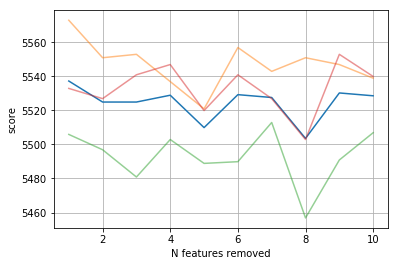

In [23]:
plot_rm_feature_scores(gsearch_results3)

#### Plot together

In [33]:
gsearch_results100 = [[100, 5530.530463485084, [5567.865183219395, 5500.8648255894295, 5522.8613816464285]]]

In [34]:
gsearch_results_all = gsearch_results1 + gsearch_results2 + gsearch_results3 + gsearch_results100
gsearch_results_all.sort(key= lambda x: x[0])

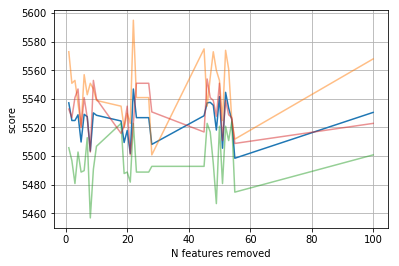

In [35]:
plot_rm_feature_scores(gsearch_results_all)

### Conclusion

Baseline Best params:  
   ('task', 'train'),  
   ('boosting_type', 'gbdt'),  
   ('objective', 'mse'),  
   ('metric', 'mape'),  
   ('learning_rate', 0.015),  
   ('num_leaves', 255),  
   ('feature_fraction', 0.5),  
   ('min_data_in_leaf', 5),  
   ('lambda_l1', 0.1),  
   ('lambda_l2', 0)  
  
Baseline Best scores: 5515.529915334645  
[5532.864763855017, 5514.864357360793, 5498.860624788125]

Removing 50 features is better than removing 23 features